In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df=pd.read_csv('/content/Dataset.csv')
# # df=pd.read_csv('/content/drive/MyDrive/Dataset.csv')

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [ ]:
X=df.copy()

In [ ]:
X1 = df.copy()
y = X1.pop('y')

In [ ]:
X.shape

(4119, 30)

In [ ]:
mutual_info_features = []  # List of features from Mutual Info
# lasso_features = []  # List of features from Lasso
selectkbest_features_minmax = []

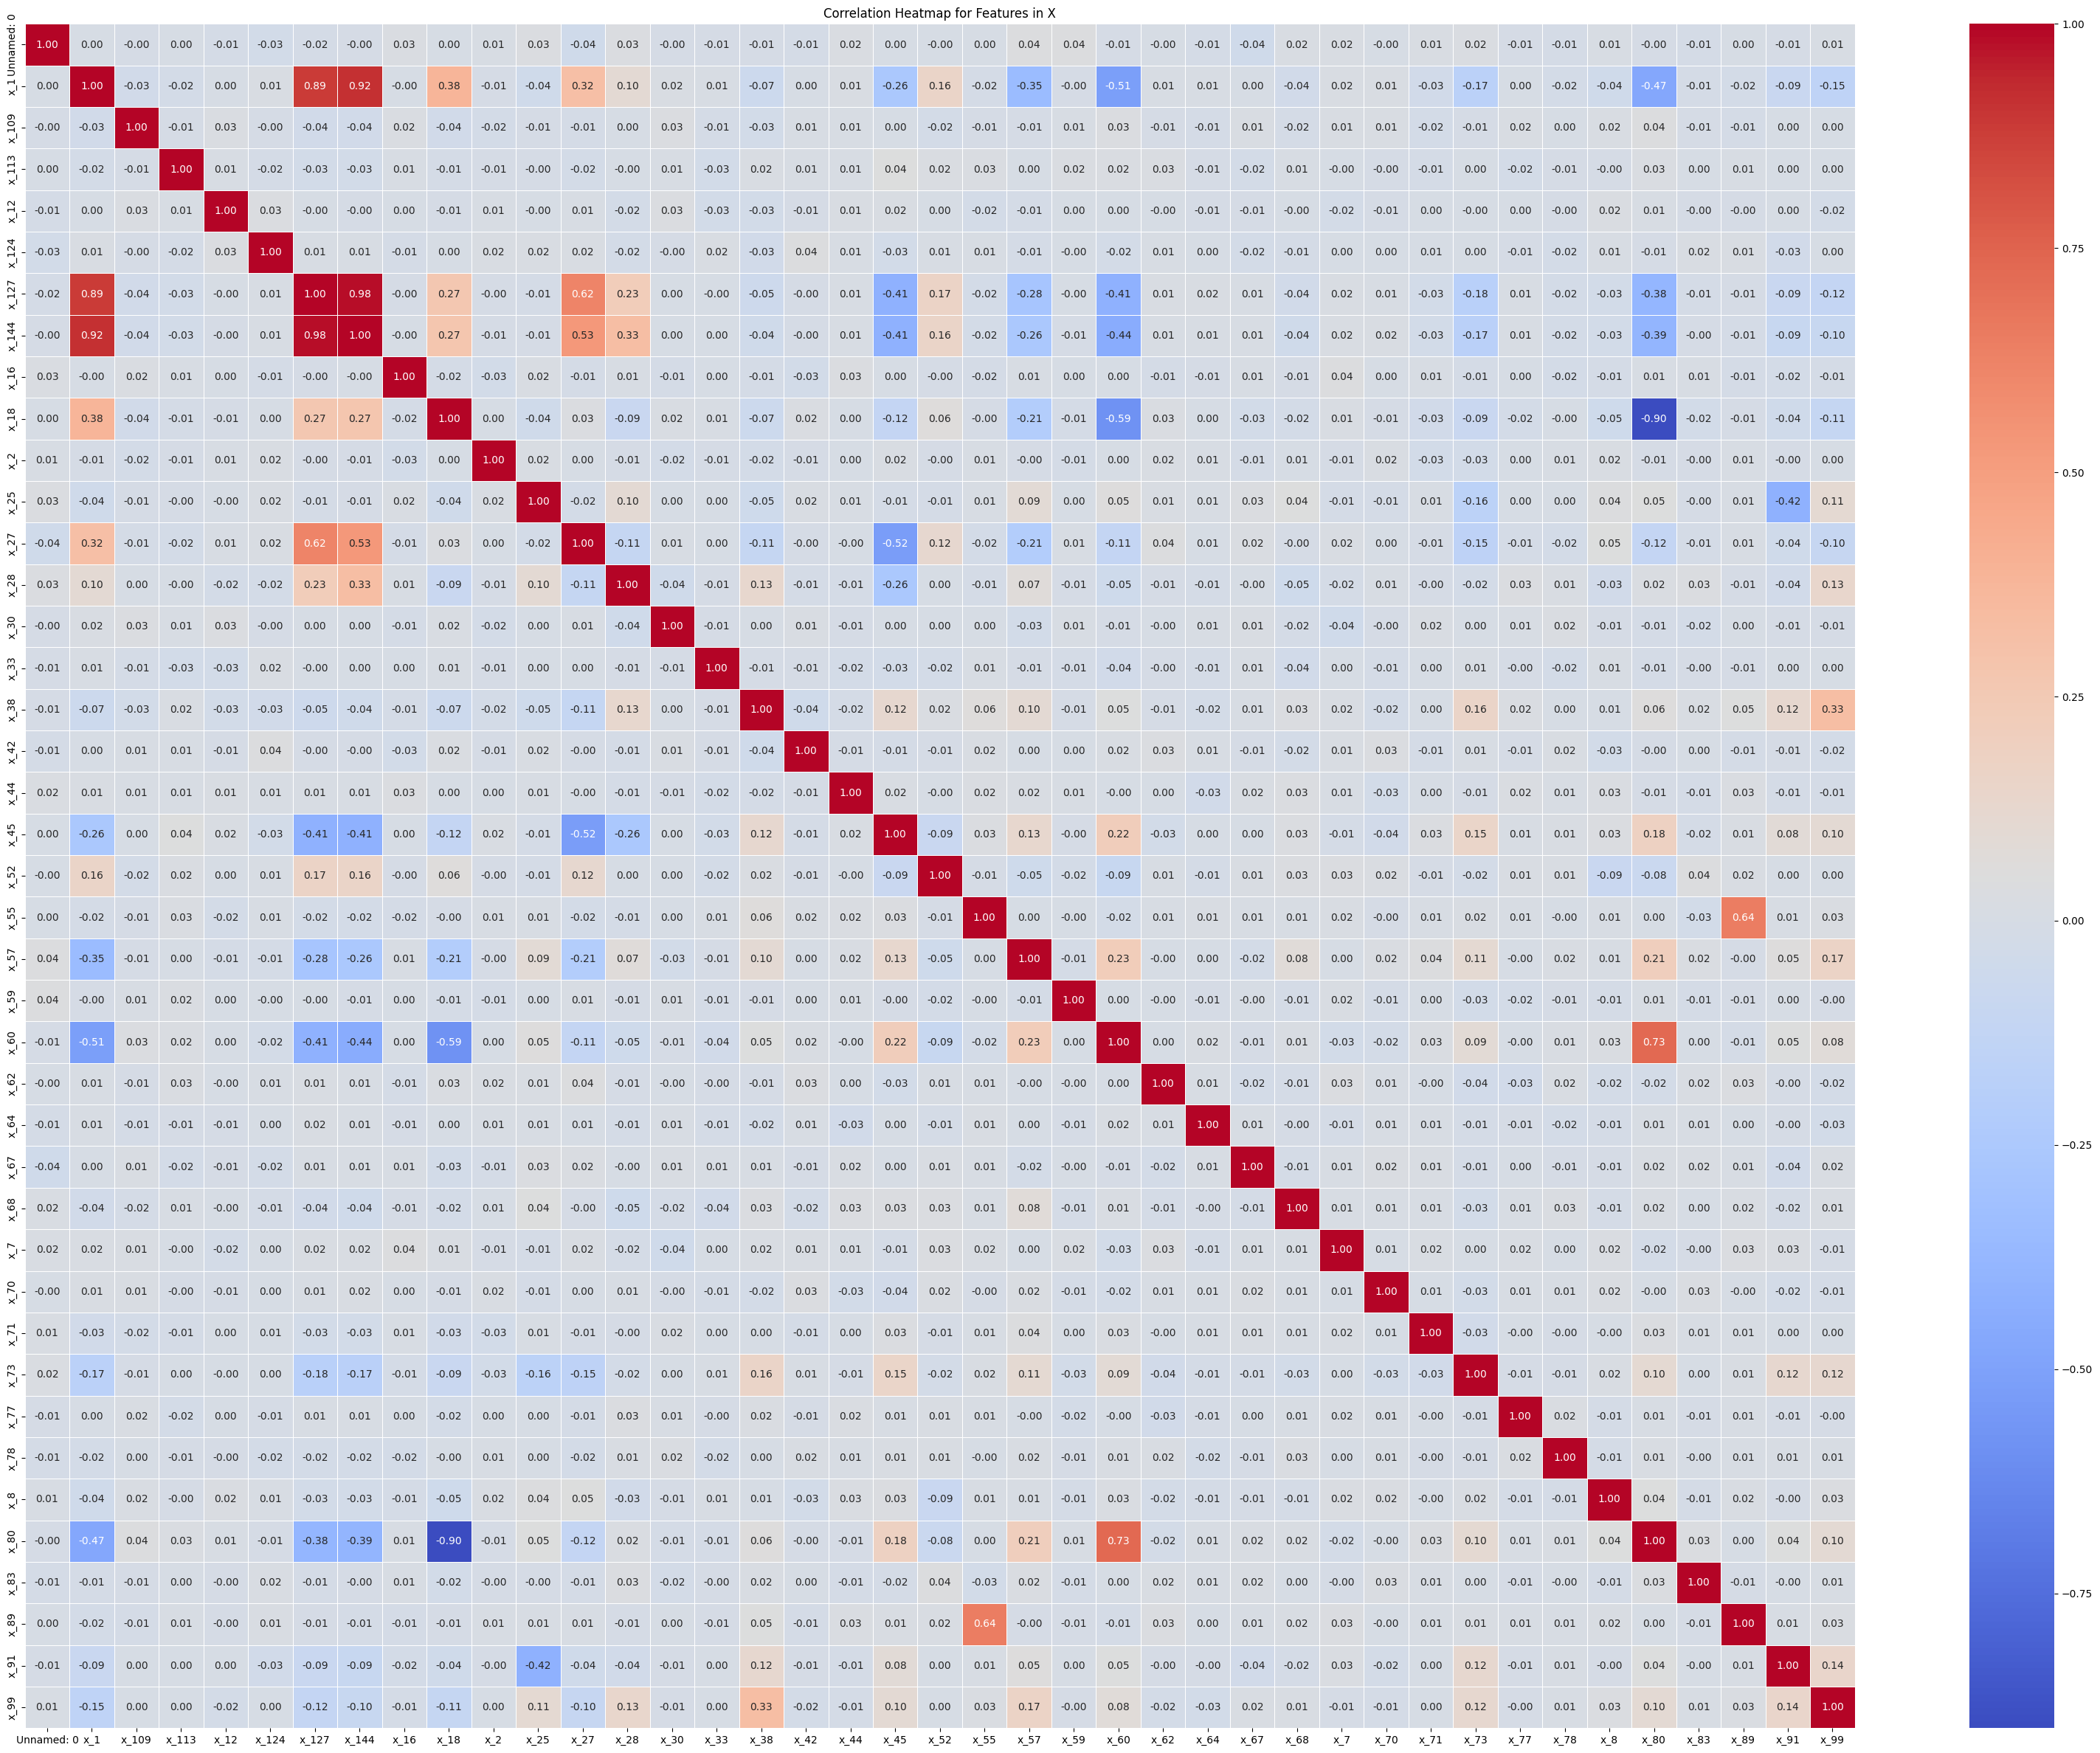

In [ ]:
X_no_target = X.drop('y', axis=1, errors='ignore')
correlation_matrix = X_no_target.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Features in X")
plt.show()


In [ ]:
X = X.drop('x_144',axis=1, errors='ignore')
X = X.drop('x_127',axis=1, errors='ignore')
X = X.drop('x_80',axis=1, errors='ignore')
X = X.drop('Unnamed: 0',axis=1, errors='ignore')

## Method 1
## Mutual Information

In [ ]:
# Segregating the Feature and Target
names=X.drop("y", axis=1).columns
y =  X.pop('y')

In [ ]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

mi_scores

x_8      0.185796
x_77     0.165909
x_44     0.158242
x_12     0.124218
x_7      0.116144
x_83     0.069503
x_28     0.067766
x_1      0.062524
x_18     0.036894
x_70     0.031458
x_59     0.027056
x_57     0.022830
x_60     0.022743
x_25     0.018471
x_124    0.011465
x_27     0.009918
x_45     0.009463
x_33     0.008991
x_16     0.008127
x_62     0.007854
x_99     0.006880
x_68     0.006059
x_89     0.005335
x_52     0.005250
x_78     0.005062
x_42     0.004229
x_73     0.002532
x_2      0.001212
x_71     0.000908
x_64     0.000551
x_109    0.000208
x_113    0.000199
x_91     0.000161
x_67     0.000118
x_30     0.000092
x_38     0.000000
x_55     0.000000
Name: MI Scores, dtype: float64

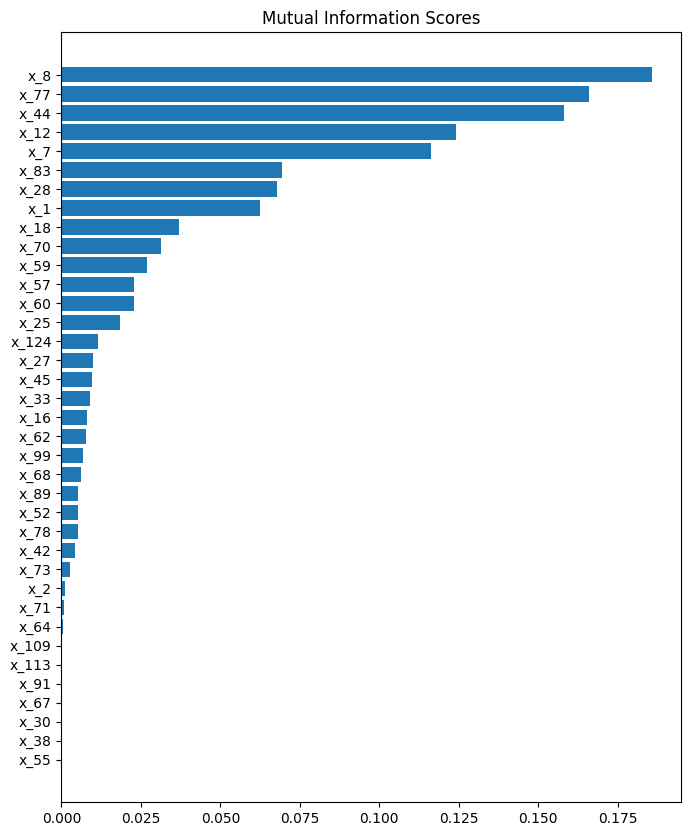

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)

In [ ]:
mutual_info_features = mi_scores.sort_values(ascending=False).head(20).index.tolist()
mutual_info_features

['x_8',
 'x_77',
 'x_44',
 'x_12',
 'x_7',
 'x_83',
 'x_28',
 'x_1',
 'x_18',
 'x_70',
 'x_59',
 'x_57',
 'x_60',
 'x_25',
 'x_124',
 'x_27',
 'x_45',
 'x_33',
 'x_16',
 'x_62']

In [ ]:
y.shape

(4119,)

## Method 2
## SelectKbest with minmax scalar

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
X.columns

Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_18', 'x_2', 'x_25',
       'x_27', 'x_28', 'x_30', 'x_33', 'x_38', 'x_42', 'x_44', 'x_45', 'x_52',
       'x_55', 'x_57', 'x_59', 'x_60', 'x_62', 'x_64', 'x_67', 'x_68', 'x_7',
       'x_70', 'x_71', 'x_73', 'x_77', 'x_78', 'x_8', 'x_83', 'x_89', 'x_91',
       'x_99'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.51136364, 1.        , 0.83333333, ..., 1.        , 0.05769231,
        0.10691824],
       [0.85984848, 0.        , 0.16666667, ..., 1.        , 0.71153846,
        0.28301887],
       [1.        , 1.        , 0.        , ..., 1.        , 0.05769231,
        0.28301887],
       ...,
       [0.51136364, 1.        , 0.16666667, ..., 1.        , 0.71153846,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.05769231,
        0.54716981],
       [0.87878788, 1.        , 0.        , ..., 1.        , 0.71153846,
        0.31446541]])

In [ ]:
 from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=20)
X1=selector.fit(X_scaled, y)

In [ ]:
selected_features_mask = selector.get_support()
feature_names = list(X.columns)
selected_feature_names = [feature_name for feature_name, selected in zip(feature_names, selected_features_mask) if selected]
selectkbest_features_minmax=selected_feature_names
print(selected_feature_names)

['x_1', 'x_109', 'x_18', 'x_25', 'x_27', 'x_28', 'x_30', 'x_33', 'x_38', 'x_45', 'x_52', 'x_57', 'x_60', 'x_64', 'x_67', 'x_71', 'x_73', 'x_8', 'x_91', 'x_99']


## Method 3
## Lasso

In [ ]:
# y

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# print("Shape of Train Features: {}".format(X_train.shape))
# print("Shape of Test Features: {}".format(X_test.shape))
# print("Shape of Train Target: {}".format(y_train.shape))
# print("Shape of Test Target: {}".format(y_test.shape))

In [ ]:
# # parameters to be tested on GridSearchCV
# params = {"alpha":np.arange(0.00001, 10, 500)}

# # Number of Folds and adding the random state for replication
# kf=KFold(n_splits=5,shuffle=True, random_state=42)

# # Initializing the Model
# lasso = Lasso()

# # GridSearchCV with model, params and folds.
# lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
# lasso_cv.fit(X, y)
# print("Best Params {}".format(lasso_cv.best_params_))

In [ ]:

# print("Column Names: {}".format(names.values))

In [ ]:
# X.columns


In [ ]:
# # calling the model with the best parameter
# lasso1 = Lasso(alpha=0.00001)
# lasso1.fit(X_train, y_train)

# # Using np.abs() to make coefficients positive.
# lasso1_coef = np.abs(lasso1.coef_)

# # plotting the Column Names and Importance of Columns.
# plt.bar(names, lasso1_coef)
# plt.xticks(rotation=90)
# plt.grid()
# plt.title("Feature Selection Based on Lasso")
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.ylim(0, 0.15)
# plt.show()

In [ ]:
# # Assuming lasso1_coef contains the coefficients and names contains the column names

# # Create a DataFrame with feature names and their importance
# feature_importance = pd.DataFrame({
#     'Feature': names,
#     'Importance': lasso1_coef
# })

# # Sort features by importance in descending order
# sorted_features = feature_importance.sort_values(by='Importance', ascending=False)

# # Select top 20 features based on their importance
# top_20_lasso_features = sorted_features.head(20)['Feature'].tolist()

# print("Top 20 features based on Lasso importance:")

# print(top_20_lasso_features)
# lasso_features=top_20_lasso_features


## Merging Data ( Taking into consoderation occurance and removing unnecessary ones )

In [ ]:
from collections import Counter

In [ ]:
# Combine all feature lists
all_features = mutual_info_features + selectkbest_features_minmax

# Count the occurrences of each feature
feature_counter = Counter(all_features)

# Sort features based on their count
sorted_features = sorted(feature_counter.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)
# # Select top 20 features based on count
top_20_features = [feature[0] for feature in sorted_features[:32]]

print("Top 20 features based on occurrence count:")
print(top_20_features)


[('x_8', 2), ('x_28', 2), ('x_1', 2), ('x_18', 2), ('x_57', 2), ('x_60', 2), ('x_25', 2), ('x_27', 2), ('x_45', 2), ('x_33', 2), ('x_77', 1), ('x_44', 1), ('x_12', 1), ('x_7', 1), ('x_83', 1), ('x_70', 1), ('x_59', 1), ('x_124', 1), ('x_16', 1), ('x_62', 1), ('x_109', 1), ('x_30', 1), ('x_38', 1), ('x_52', 1), ('x_64', 1), ('x_67', 1), ('x_71', 1), ('x_73', 1), ('x_91', 1), ('x_99', 1)]
Top 20 features based on occurrence count:
['x_8', 'x_28', 'x_1', 'x_18', 'x_57', 'x_60', 'x_25', 'x_27', 'x_45', 'x_33', 'x_77', 'x_44', 'x_12', 'x_7', 'x_83', 'x_70', 'x_59', 'x_124', 'x_16', 'x_62', 'x_109', 'x_30', 'x_38', 'x_52', 'x_64', 'x_67', 'x_71', 'x_73', 'x_91', 'x_99']


In [ ]:
X = X[top_20_features]
X.columns

Index(['x_8', 'x_28', 'x_1', 'x_18', 'x_57', 'x_60', 'x_25', 'x_27', 'x_45',
       'x_33', 'x_77', 'x_44', 'x_12', 'x_7', 'x_83', 'x_70', 'x_59', 'x_124',
       'x_16', 'x_62', 'x_109', 'x_30', 'x_38', 'x_52', 'x_64', 'x_67', 'x_71',
       'x_73', 'x_91', 'x_99'],
      dtype='object')

## XGboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
params = {
'n_estimators': range(1, 7),
'max_depth': range(1,7),
'learning_rate': [.1, .2, .3, .4, .5],
'colsample_bytree': [.6, .7, .8, .9, 1]
}
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
xgb = XGBClassifier()
g_search = GridSearchCV(estimator = xgb, param_grid = params,
cv = 3, n_jobs = -1, verbose = 0, return_train_score=True)
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'colsample_bytree': 1, 'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 6}


In [ ]:
xgb_model = XGBClassifier(colsample_bytree=0.7, n_estimators= 6,learning_rate=0.4, max_depth=3, objective='binary:logistic')
mod = xgb_model.fit(X_train, y_train,eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


## ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train and y_train are your training data
# Create an AdaBoost classifier with a base Decision Tree
base_tree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_tree)

# Specify parameters for grid search
params_adaboost = {
    'n_estimators': [50, 100, 150],  # Adjust as needed
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform grid search
grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=params_adaboost, cv=3, n_jobs=-1, verbose=0, return_train_score=True)
grid_search_adaboost.fit(X_train, y_train)

# Print best parameters
print(grid_search_adaboost.best_params_)



{'learning_rate': 0.01, 'n_estimators': 50}


In [ ]:
# Create and fit AdaBoost model with best parameters
best_adaboost_model = AdaBoostClassifier(base_tree, n_estimators=grid_search_adaboost.best_params_['n_estimators'],
                                         learning_rate=grid_search_adaboost.best_params_['learning_rate'])
best_adaboost_model.fit(X_train, y_train)
'''
# Print feature importances
feature_importances_adaboost = best_adaboost_model.feature_importances_
feature_importance_dict_adaboost = dict(zip(X_train.columns, feature_importances_adaboost))

sorted_feature_importance_adaboost = sorted(feature_importance_dict_adaboost.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_feature_importance_adaboost:
    print(f"{feature}: {importance}")
'''

'\n# Print feature importances\nfeature_importances_adaboost = best_adaboost_model.feature_importances_\nfeature_importance_dict_adaboost = dict(zip(X_train.columns, feature_importances_adaboost))\n\nsorted_feature_importance_adaboost = sorted(feature_importance_dict_adaboost.items(), key=lambda x: x[1], reverse=True)\n\n# Print the feature importances\nfor feature, importance in sorted_feature_importance_adaboost:\n    print(f"{feature}: {importance}")\n'

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Assuming best_xgb_model and best_catboost_model are already trained models

mix_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('adaboost', best_adaboost_model)
], voting='soft')

mix_model.fit(X_train, y_train)
y_pred = mix_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Accuracy: {accuracy}")
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Assuming mix_model is already defined and trained
mix_model.fit(X_train, y_train)

# Get individual model feature importances
xgb_feature_importances = xgb_model.feature_importances_
catboost_feature_importances = best_adaboost_model.feature_importances_

# Calculate weighted average of feature importances based on model accuracy
accuracy_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
accuracy_catboost = accuracy_score(y_test, best_adaboost_model.predict(X_test))

# Calculate weights based on accuracy
weight_xgb = accuracy_xgb / (accuracy_xgb + accuracy_catboost)
weight_catboost = accuracy_catboost / (accuracy_xgb + accuracy_catboost)

# Calculate the weighted average of feature importances
weighted_average_importances = (weight_xgb * xgb_feature_importances) + (weight_catboost * catboost_feature_importances)

# Zip together feature names and their corresponding importances
feature_importance_dict = dict(zip(X_train.columns, weighted_average_importances))

# Sort the dictionary by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Ensemble Accuracy: 0.8895631067961165
x_8: 0.4123855739824769
x_1: 0.3553912253981979
x_18: 0.059219548617817606
x_57: 0.028293902391120056
x_33: 0.017892081290483475
x_45: 0.017304005101323128
x_28: 0.014689551886364675
x_16: 0.014398603849042454
x_38: 0.01347105111926794
x_44: 0.011996429612606139
x_25: 0.01049684826284647
x_7: 0.010214371606707573
x_99: 0.00815382320433855
x_124: 0.0073187160305678844
x_71: 0.005569736007601023
x_83: 0.005323752295225859
x_12: 0.004470621235668659
x_59: 0.0034101265482604504
x_60: 0.0
x_27: 0.0
x_77: 0.0
x_70: 0.0
x_62: 0.0
x_109: 0.0
x_30: 0.0
x_52: 0.0
x_64: 0.0
x_67: 0.0
x_73: 0.0
x_91: 0.0


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace this with your actual data

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create a weak learner (in this case, a decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the parameters as needed

# Step 3: Create the AdaBoost model
n_estimators = 50  # You can adjust the number of weak learners
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=n_estimators, random_state=42)

# Step 4: Train the model on the training data
adaboost_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [ ]:
# Assuming xgb_model is already trained
feature_importances = xgb_model.feature_importances_

# Zip together feature names and their corresponding importances
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the dictionary by importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

x_1: 0.32440513372421265
x_8: 0.2816278636455536
x_18: 0.0789250060915947
x_33: 0.03637645021080971
x_45: 0.03518083319067955
x_28: 0.028548026457428932
x_16: 0.02827797271311283
x_57: 0.027568994089961052
x_38: 0.027388039976358414
x_25: 0.021341178566217422
x_7: 0.02076687291264534
x_44: 0.019966337829828262
x_99: 0.016577566042542458
x_124: 0.01487970631569624
x_71: 0.011323848739266396
x_83: 0.010823738761246204
x_12: 0.009089235216379166
x_59: 0.0069331396371126175
x_60: 0.0
x_27: 0.0
x_77: 0.0
x_70: 0.0
x_62: 0.0
x_109: 0.0
x_30: 0.0
x_52: 0.0
x_64: 0.0
x_67: 0.0
x_73: 0.0
x_91: 0.0


In [ ]:
from sklearn.metrics import accuracy_score
predictions = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9029126213592233

In [ ]:
X_train.shape

(3295, 30)

In [ ]:
# # Define the autoencoder architecture
# import tensorflow as tf
# import keras
# input_dim = X_train.shape[1]
# encoding_dim = 2

# # Set the encoding dimension
# input_layer = keras.layers.Input(shape=(4119,))
# encoder = keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
# decoder = keras.layers.Dense(input_dim, activation="sigmoid")(encoder)
# autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

# # Compile the autoencoder
# autoencoder.compile(optimizer='adam', loss='mse')

# # Summary of the autoencoder architecture
# autoencoder.summary()

In [ ]:
# autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)

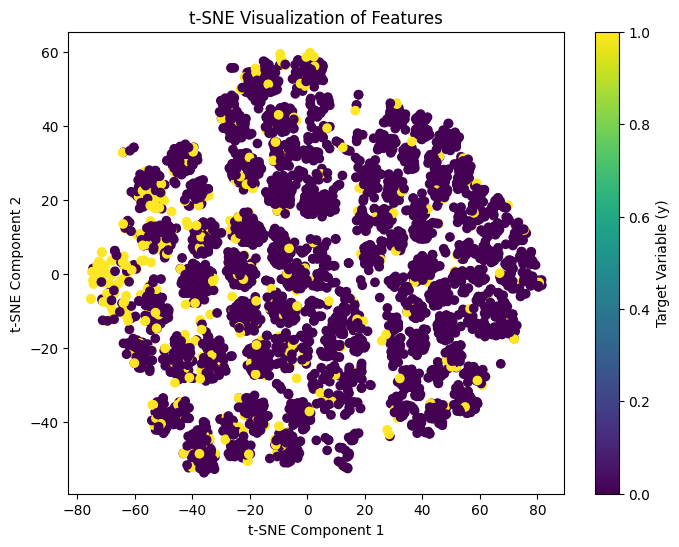

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you've already scaled your data (X_normalized from the previous example)
# You can use t-SNE to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

# Visualize the data after t-SNE transformation
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Target Variable (y)')
plt.show()

In [ ]:
## Final X


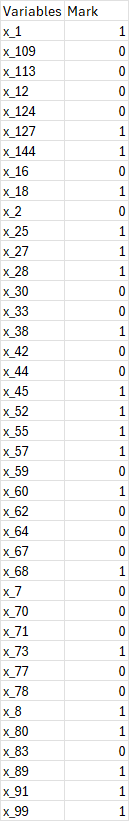

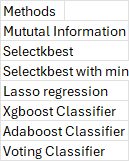